In [1]:
import numpy as np

import soss_read_refs

import matplotlib.pyplot as plt

plt.rc('figure', figsize=(13,8))
plt.rc('font', size=16)
plt.rc('image', cmap='inferno')
plt.rc('lines', lw=2)

In [2]:
ref_trace_table = 'Generate_ref_files/SOSS_ref_trace_table.fits'
ref_2d_wave = 'Generate_ref_files/SOSS_ref_2D_wave.fits'
ref_2d_profile = 'Generate_ref_files/SOSS_ref_2D_profile.fits'
ref_kernels = 'Generate_ref_files/SOSS_ref_spectral_kernel.fits'

Example: how to use the trace table.

In [3]:
reference = soss_read_refs.RefTraceTable(ref_trace_table)
wavelenghts, y = reference('Y', subarray='SUBSTRIP96')
wavelenghts, x = reference('X', subarray='SUBSTRIP96')

(0.0, 95.0)

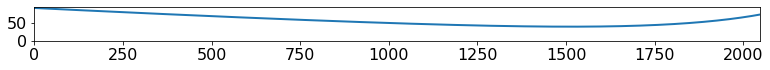

In [4]:
plt.subplot(111, aspect='equal')
plt.plot(x, y)
plt.xlim(0, 2047)
plt.ylim(0, 95)

In [5]:
wavelengths = np.linspace(2, 3, 101)
wavelengths, troughput = reference('THROUGHPUT', wavelengths=wavelengths, order=2)

Text(0, 0.5, 'Throughput')

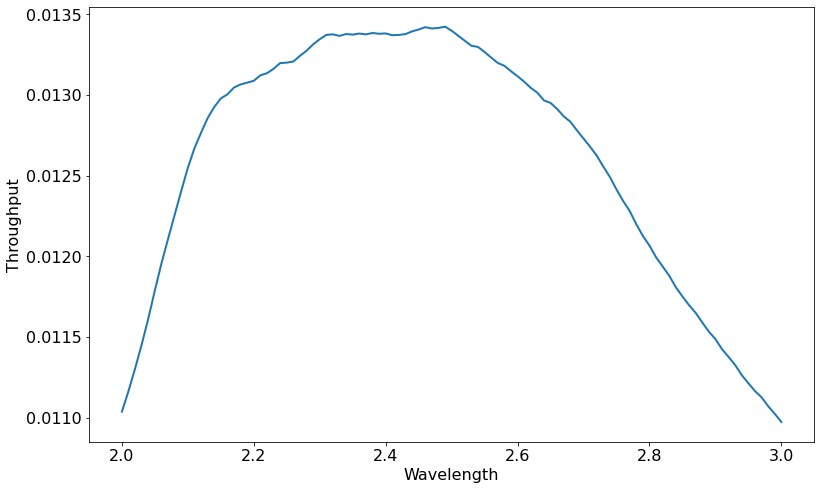

In [6]:
plt.plot(wavelengths, troughput)
plt.xlabel('Wavelength')
plt.ylabel('Throughput')

Example: how to use the 2d profile and 2d wavemap.

In [7]:
reference = soss_read_refs.Ref2dProfile(ref_2d_profile)
profile = reference(order=2)

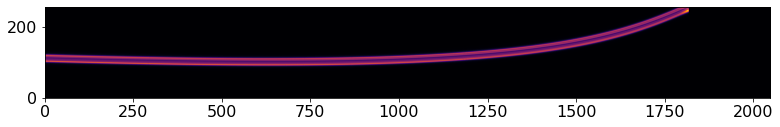

In [8]:
plt.imshow(profile, origin='lower')

If you don't want the 2d maps to have their padding removed and binned down to native pixels.

In [9]:
profile = reference(native=False)

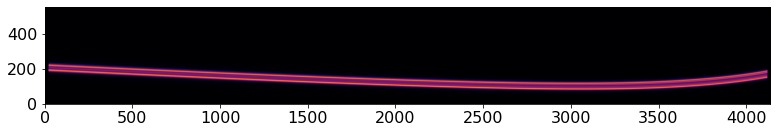

In [10]:
plt.imshow(profile, origin='lower')

In [11]:
reference = soss_read_refs.Ref2dWave(ref_2d_wave)
wavemap = reference(subarray='SUBSTRIP96', offset=[2.3, 3.5])

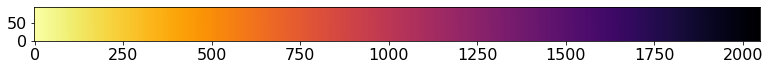

In [12]:
plt.imshow(wavemap, origin='lower')

Example: how to use the kernels.

In [13]:
reference = soss_read_refs.RefKernels(ref_kernels)
wavelengths, kernels = reference()

[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15
 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85
 1.9  1.95 2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55
 2.6  2.65 2.7  2.75 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25
 3.3  3.35 3.4  3.45 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95
 4.   4.05 4.1  4.15 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65
 4.7  4.75 4.8  4.85 4.9  4.95 5.   5.05 5.1  5.15 5.2 ]


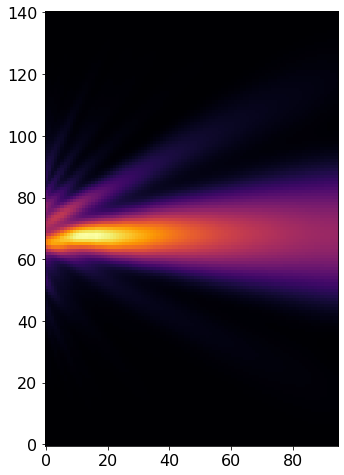

In [14]:
print(wavelengths)
plt.imshow(kernels, origin='lower')